In [1]:
#import the pyplot and wavfile modules 

import sys
sys.path.append("/bchhaglani/Downloads/ffmpeg")
import matplotlib.pyplot as plot



from scipy.io import wavfile


import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as sps

import os


# def add_usr_local_bin():
#     ffmpeg_path = "/usr/local/bin"
#     os.environ["PATH"] += os.pathsep + ffmpeg_path
    
    
# add_usr_local_bin()
import ffmpeg
import ffprobe

44100 25.769297052154194


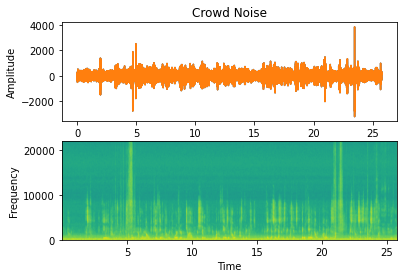

In [2]:
# Read the wav file (mono)
WAV_FILE_NAME  = 'ted_withAir.wav'
samplingFrequency, signalData = wavfile.read(WAV_FILE_NAME)
times = np.arange(len(signalData))/samplingFrequency


print(samplingFrequency, times[-1])
 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Crowd Noise')

 

plot.plot(times,signalData)

plot.xlabel('time')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData[:,0],Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

In [1]:
from pydub import AudioSegment,silence


myaudio = intro = AudioSegment.from_wav(WAV_FILE_NAME)

# print (myaudio)

silence = silence.detect_silence(myaudio, min_silence_len=16, silence_thresh=-96)

silence = [((start/1000),(stop/1000)) for start,stop in silence] #convert to sec
print (silence)

total_silence = 0
for i in silence:
    total_silence += (i[1]-i[0])

percent_silence = total_silence/times[-1]

print ("percentage of silence: ", percent_silence)
print ("silence periods: ", len(silence))

ModuleNotFoundError: No module named 'pydub'

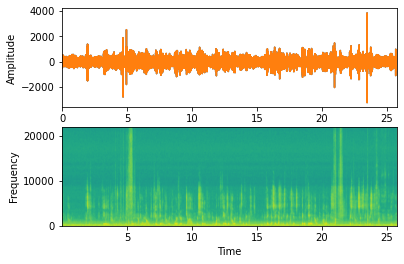

In [4]:
import numpy as np
import matplotlib.pyplot as plt



# Plot the signal read from wav file

plt.subplot(211)

# plt.title('Crowd Noise')

 
for i in silence:
    plt.axvspan(i[0], i[1], color='y', alpha=0.5, lw=1)

plt.xlim([0,25.769297052154194])

plt.plot(times,signalData)


plt.xlabel('time')

plt.ylabel('Amplitude')

 

plt.subplot(212)

for i in silence:
    plt.axvspan(i[0], i[1], color='r', alpha=0.5, lw=1)




plt.specgram(signalData[:,0],Fs=samplingFrequency)

plt.xlabel('Time')

plt.ylabel('Frequency')

plt.savefig("silence_ted.png")

plt.show()
    


In [5]:
def Filter(signal, low_cut, high_cut):
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    data = scipy.signal.filtfilt(b, a, signal, axis = 0)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(221)

    plt.plot(signal)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('before filtering')

    plt.subplot(222)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')


    plt.subplot(223)
    plt.specgram(signal[:,0], Fs=fs)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('before filtering')

    plt.subplot(224)
    plt.specgram(data[:,0], Fs=fs)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.show()

    return(data)


def subsampling(prevdata, new_rate=1000):
    sampling_rate = 48000
    # Resample data
    number_of_samples = round(len(prevdata) * float(new_rate) / sampling_rate)
    data = sps.resample(prevdata, number_of_samples)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(221)

    plt.plot(prevdata)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('before subsampling')

    plt.subplot(222)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('after subsampling at ' + str(new_rate) + ' Hz')


    plt.subplot(223)
    plt.specgram(prevdata, Fs=sampling_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('before subsampling')

    plt.subplot(224)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after subsampling at ' + str(new_rate) + ' Hz')

    plt.show()
    
    return data


def filter_then_subsample(signal, low_cut, high_cut, new_rate=1000):
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    filtered = scipy.signal.filtfilt(b, a, signal, axis = 0)
    
    sampling_rate = fs
    # Resample data
    number_of_samples = round(len(filtered) * float(new_rate) / sampling_rate)
    data = sps.resample(filtered, number_of_samples)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(231)

    plt.plot(signal)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('original signal')

    plt.subplot(232)

    plt.plot(filtered)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.subplot(233)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('subsample('+ str(new_rate)+') after filtering')


    plt.subplot(234)
    plt.specgram(signal, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('original signal')

    plt.subplot(235)
    plt.specgram(filtered, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after filtering '+ str(low_cut)+'-'+str(high_cut)+'Hz')

    plt.subplot(236)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('subsample('+ str(new_rate)+') after filtering')

    plt.show()
    return data
    
    
    
def subsample_then_filter(prevdata,  low_cut, high_cut, new_rate=1000):

    # Read file
    sampling_rate = 48000.0

    # Resample data
    number_of_samples = round(len(prevdata) * float(new_rate) / sampling_rate)
    data = sps.resample(prevdata, number_of_samples)
    
    fs = 48000.0
    lowcut = low_cut # 20.0
    highcut = high_cut # 50.0
    
    nyq = 0.5 * fs
    low = lowcut / nyq        # what values should I use in this bandpass filter...After applying this filter there is still noise in my audio           
    high = highcut / nyq      # i know this method should be user dynamic, however what values should I use to significantly reduce the noise
                              # also in our research, do we have to get rid of the noise? 
    
    order = 2
    
    b, a = scipy.signal.butter(order, [low,high], 'bandpass', analog = False)
    y = scipy.signal.filtfilt(b, a, data, axis = 0)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(231)

    plt.plot(prevdata)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('original signal')

    plt.subplot(232)

    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('subsampled at '+ str(new_rate))

    plt.subplot(233)
    plt.plot(y)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('filter after subsampling')


    plt.subplot(234)
    plt.specgram(prevdata, Fs=samplingFrequency)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('original signal')

    plt.subplot(235)
    plt.specgram(data, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('subsampled at '+ str(new_rate))

    plt.subplot(236)
    plt.specgram(y, Fs=new_rate)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('filter after subsampling')

    plt.show()
    return data
    
    
    
    return(y)
    
    
    

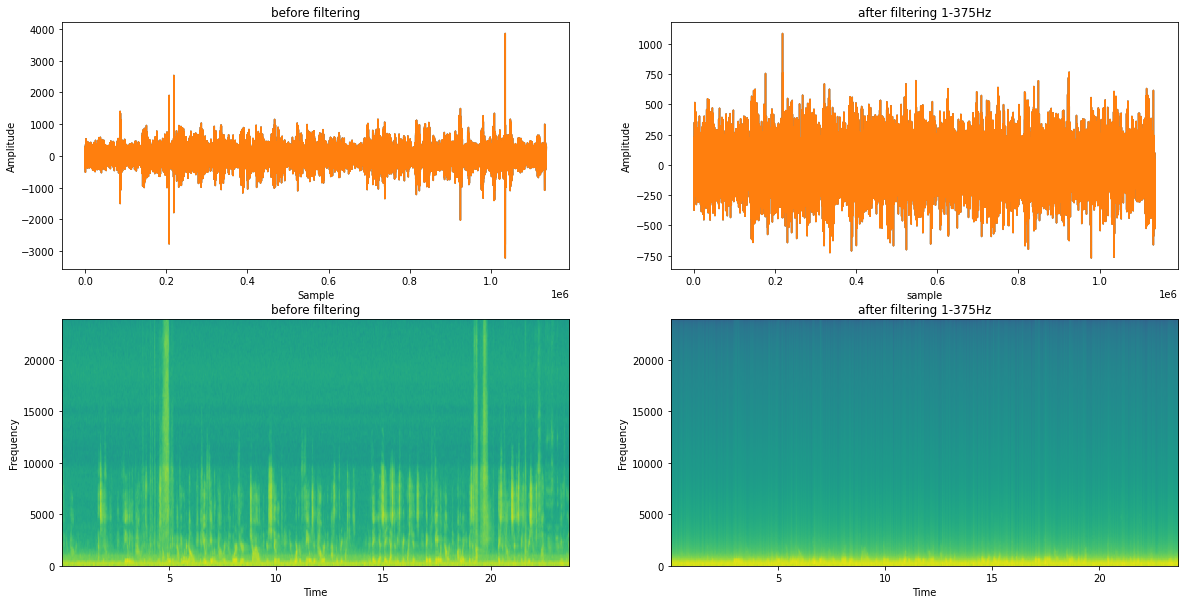

In [6]:
#only filter

output = Filter(signalData, 1, 375)
wavfile.write(os.path.join("./", f'filtered_{WAV_FILE_NAME}'), samplingFrequency, output)

In [7]:
from pydub import AudioSegment,silence

samplingFrequency, signalData = wavfile.read(f'filtered_{WAV_FILE_NAME}')
print (samplingFrequency)

myaudio = intro = AudioSegment.from_wav('filtered_3way_withAir.wav')

silence = silence.detect_silence(myaudio, min_silence_len=16, silence_thresh=-45)

silence = [((start/1000),(stop/1000)) for start,stop in silence] #convert to sec
print (silence)

44100


/Users/bchhaglani/miniforge3/lib/python3.9/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ffprobe'